In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Create dataframes from CSV files
indeed_data_df = pd.read_csv('Resources/indeed_data.csv')
dice_data_df = pd.read_csv('Resources/dice_data.csv')
jobs_data_df = pd.read_csv('Resources/jobs_data.csv')
city_locations_df = pd.read_csv('Resources/city_locations.csv')

#### Indeed

In [ ]:
# Clean up dataframe
# indeed_data_df.describe()
indeed_data_df = indeed_data_df[['position','company','description','location']]
indeed_data_df[['location','State']] = indeed_data_df['location'].str.split(',',expand=True)
indeed_data_df[['State','Zip Code']] = indeed_data_df['State'].str.split(expand=True)
indeed_data_df.head()

#### Dice

In [3]:
# Clean up dataframe
# dice_data_df.describe()
dice_data_df = dice_data_df[['jobtitle','jobdescription','employmenttype_jobstatus',
                             'company','joblocation_address','shift','skills']]

In [4]:
dice_data_df[['joblocation_address','State','Zip Code']] = dice_data_df['joblocation_address'].str.split(',',expand=True)

dice_data_df = dice_data_df[['jobtitle','jobdescription','employmenttype_jobstatus',
                             'company','joblocation_address','State','shift','skills']]

dice_data_df = dice_data_df.rename(columns = {
    'jobtitle': 'Job Title',
    'jobdescription': 'Job Description',
    'employmenttype_jobstatus': 'Employment Type',
    'company': 'Company',
    'joblocation_address': 'City',
    'State': 'State',
    'shift': 'Shift',
    'skills': 'Skills'
})

dice_data_df.head()

,Job Title,Job Description,Employment Type,Company,City,State,Shift,Skills
0,AUTOMATION TEST ENGINEER,Looking for Selenium engineers...must have sol...,"C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...","Digital Intelligence Systems, LLC",Atlanta,GA,Telecommuting not available|Travel not required,SEE BELOW
1,Information Security Engineer,The University of Chicago has a rapidly growin...,Full Time,University of Chicago/IT Services,Chicago,IL,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo..."
2,Business Solutions Architect,"GalaxE.SolutionsEvery day, our solutions affec...",Full Time,"Galaxy Systems, Inc.",Schaumburg,IL,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in..."
3,"Java Developer (mid level)- FT- GREAT culture,...",Java DeveloperFull-time/direct-hireBolingbrook...,Full Time,TransTech LLC,Bolingbrook,IL,Telecommuting not available|Travel not required,Please see job description
4,DevOps Engineer,Midtown based high tech firm has an immediate ...,Full Time,Matrix Resources,Atlanta,GA,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma..."


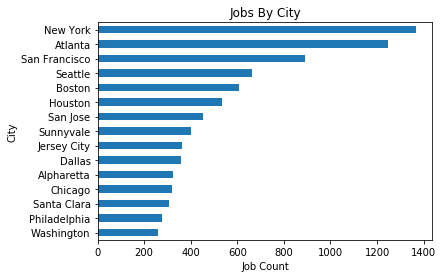

In [5]:
city_jobs_df = pd.DataFrame(dice_data_df['City'].value_counts().reset_index())
city_jobs_df.columns = ['City', 'Job Count']
most_city_jobs_df = city_jobs_df.nlargest(15,['Job Count'])
most_city_jobs_df.sort_values('Job Count',ascending=True,inplace=True)

most_city_jobs_plot = most_city_jobs_df.plot.barh(x='City',y='Job Count')
most_city_jobs_plot.set_xlabel("Job Count")
most_city_jobs_plot.set_ylabel("City")
most_city_jobs_plot.set_title("Jobs By City")
most_city_jobs_plot.get_legend().remove()
plt.show()

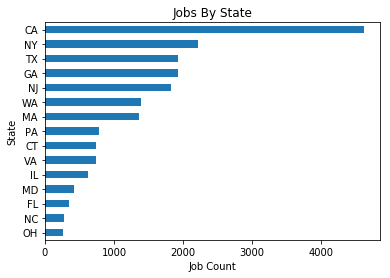

In [6]:
dice_data_df['State'] = dice_data_df['State'].str.strip()

dice_data_df['State'] = dice_data_df['State'].replace(
    {'Springs':'CO','Washington':'WA','Texas': 'TX','Pa':'PA','Oh':'OH', 'Va':'VA', 'Md':'MD', 'Dc':'DC'})

dice_data_df['City'] = dice_data_df['City'].replace(
    {'Colorado':'Springs'})

dice_data_df = dice_data_df.loc[dice_data_df["State"].notnull(), :]

state_jobs_df = pd.DataFrame(dice_data_df['State'].value_counts().reset_index())
state_jobs_df.columns = ['State', 'Job Count']
most_state_jobs_df = state_jobs_df.nlargest(15,['Job Count'])
most_state_jobs_df.sort_values('Job Count',ascending=True,inplace=True)

most_state_jobs_plot = most_state_jobs_df.plot.barh(x='State',y='Job Count')
most_state_jobs_plot.set_xlabel("Job Count")
most_state_jobs_plot.set_ylabel("State")
most_state_jobs_plot.set_title("Jobs By State")
most_state_jobs_plot.get_legend().remove()
plt.show()

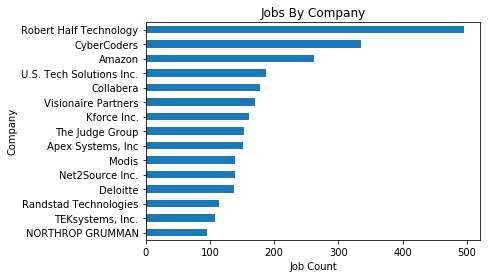

In [7]:
dice_data_df['Company'] = dice_data_df['Company'].replace({'Robert Half': 'Robert Half Technology'})

company_jobs_df = pd.DataFrame(dice_data_df['Company'].value_counts().reset_index())
company_jobs_df.columns = ['Company', 'Job Count']
most_company_jobs_df = company_jobs_df.nlargest(15,['Job Count'])
most_company_jobs_df.sort_values('Job Count',inplace=True)
most_company_jobs_df

most_company_jobs_plot = most_company_jobs_df.plot.barh(x='Company',y='Job Count')
most_company_jobs_plot.set_xlabel("Job Count")
most_company_jobs_plot.set_ylabel("Company")
most_company_jobs_plot.set_title("Jobs By Company")
most_company_jobs_plot.get_legend().remove()
plt.show()

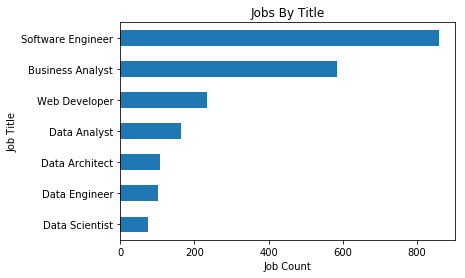

In [8]:
dice_data_analyst = dice_data_df[dice_data_df['Job Title'].str.contains('Data Analyst')]
dice_data_scientist = dice_data_df[dice_data_df['Job Title'].str.contains('Data Scientist')]
dice_data_engineer = dice_data_df[dice_data_df['Job Title'].str.contains('Data Engineer')]
dice_data_architect = dice_data_df[dice_data_df['Job Title'].str.contains('Data Architect')]
dice_data_architect = dice_data_df[dice_data_df['Job Title'].str.contains('Data Architect')]
dice_software_engineer = dice_data_df[dice_data_df['Job Title'].str.contains('Software Engineer')]
dice_web_developer = dice_data_df[dice_data_df['Job Title'].str.contains('Web Developer')]
dice_business_analyst = dice_data_df[dice_data_df['Job Title'].str.contains('Business Analyst')]

dice_job_titles_df = pd.DataFrame({
    "Job Title": ["Data Analyst","Data Scientist","Data Engineer","Data Architect","Software Engineer","Web Developer","Business Analyst"],
    "Job Count": [len(dice_data_analyst),len(dice_data_scientist),len(dice_data_engineer),len(dice_data_architect),len(dice_software_engineer),len(dice_web_developer),len(dice_business_analyst)]
})

dice_job_titles_df.sort_values('Job Count',inplace=True)

job_title_plot = dice_job_titles_df.plot.barh(x='Job Title',y='Job Count')
job_title_plot.set_xlabel("Job Count")
job_title_plot.set_ylabel("Job Title")
job_title_plot.set_title("Jobs By Title")
job_title_plot.get_legend().remove()
plt.show()

In [10]:
location_data_df = pd.merge(dice_data_df, city_locations_df, how='left', on=['City', 'State'])
location_data_df = location_data_df.loc[location_data_df["Lat"].notnull(), :]

location_job_count = location_data_df.groupby(['Lat','Lng']).count().reset_index()
location_job_count_df = pd.DataFrame({
    "Lat": location_job_count['Lat'],
    "Lng": location_job_count['Lng'],
    "Job Count": location_job_count['Job Title']
})

# Store latitude and longitude in locations
locations = location_job_count_df[["Lat", "Lng"]]

# Convert to float
jobs = location_job_count_df["Job Count"].astype(float)

In [11]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=jobs, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

#### Jobs Data

In [ ]:
# Clean up dataframe
jobs_data_df.head()
jobs_data_df = jobs_data_df[['job_title','company_name','city']]
jobs_data_df['city'] = jobs_data_df['city'].str.replace('+',' ')
jobs_data_df